/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


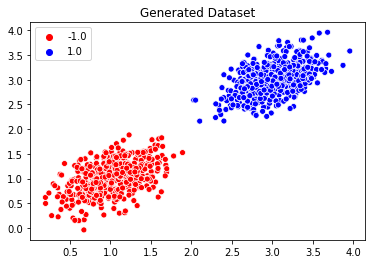

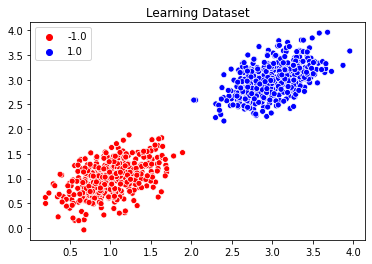

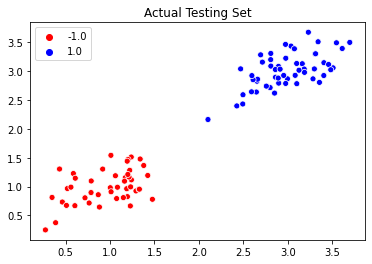

     pcost       dcost       gap    pres   dres
 0: -6.0895e+01 -1.0746e+02  3e+03  5e+01  2e+00
 1: -5.4858e+01 -2.1777e+01  5e+02  1e+01  4e-01
 2: -6.3614e+01 -2.3344e+01  5e+02  1e+01  3e-01
 3: -6.3316e+01 -1.0877e+01  2e+02  3e+00  1e-01
 4: -5.1395e+00 -3.8031e+00  9e+00  1e-01  4e-03
 5: -3.1912e+00 -3.3946e+00  2e-01  7e-16  3e-14
 6: -3.3563e+00 -3.3585e+00  2e-03  1e-15  2e-14
 7: -3.3580e+00 -3.3581e+00  2e-05  4e-16  2e-14
 8: -3.3581e+00 -3.3581e+00  2e-07  1e-15  2e-14
Optimal solution found.
3 support vectors out of 900 points


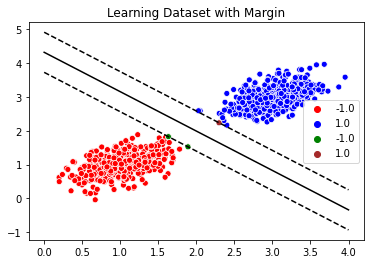

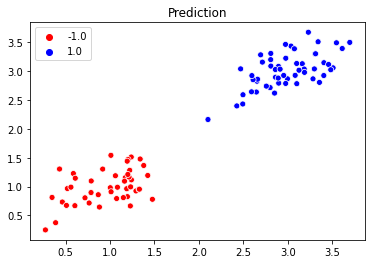

Error in prediction : 0.0%


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
import seaborn as sbn
import copy
import random as rnd
import cvxopt
from sklearn.model_selection import train_test_split

def generatedataset(size,mean1,cov1,mean2,cov2): 
  np.random.seed(0) 
  n = int(size/2)
  Y1 = np.ones(n)*-1.0
  X1 = np.random.multivariate_normal(mean1,cov1,size=n)
  D1 = np.c_[X1,Y1]
  Y2 = np.ones(n)
  X2 = np.random.multivariate_normal(mean2,cov2,size=n)
  D2 = np.c_[X2,Y2]
  dataset = np.concatenate((D1,D2),axis=0)
  np.random.shuffle(dataset)
  return dataset

def HardMlinearSVM(learnset):
  n = len(learnset)
  X = learnset[:,:-1]
  y = learnset[:,-1]
  K = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      K[i,j] = np.dot(X[i],X[j])
  P = cvxopt.matrix(np.outer(y,y) * K)
  q = cvxopt.matrix(np.ones(n) * -1)
  A = cvxopt.matrix(y, (1,n))
  b = cvxopt.matrix(0.0)
  G = cvxopt.matrix(np.diag(np.ones(n) * -1))
  h = cvxopt.matrix(np.zeros(n))
  solution = cvxopt.solvers.qp(P, q, G, h, A, b)
  aa = np.ravel(solution['x'])
  sv = aa > 1e-5
  ind = np.arange(len(aa))[sv]
  a = aa[sv]
  SV = X[sv]
  SV_y = y[sv]
  print("%d support vectors out of %d points" % (len(a), n))

  b = 0
  for i in range(len(a)):
    b = b + SV_y[i]
    b = b - np.sum(a*SV_y*K[ind[i],sv])
  b = b/len(a)

  w = np.zeros(len(X[0]))
  for i in range(len(a)):
    w = w + a[i]*SV_y[i]*SV[i]
  return w,b,SV,SV_y

def predict(w,b,testset):
  data = testset[:,:-1]
  lbl = np.sign(np.dot(data,w)+b)
  sbn.scatterplot(data[:,0],data[:,1],hue = lbl,palette = ['red','blue']).set_title('Prediction')
  plt.show()
  return lbl

def plotmargin(learnset,w,b,sv,sy):
  def f(x,w,b,c=0):
    return (-w[0]*x-b+c)/w[1]
  
  sbn.scatterplot(learnset[:,0],learnset[:,1],hue = learnset[:,2],palette = ['red','blue'])#.set_title('Prediction')
  sbn.scatterplot(sv[:,0],sv[:,1],hue = sy,palette = ['green','brown']).set_title('Learning Dataset with Margin')

  a0 = 0; a1 = f(a0,w,b)
  b0 = 4; b1 = f(b0,w,b)
  plt.plot([a0,b0],[a1,b1],"k")

  a1 = f(a0,w,b,1)
  b1 = f(b0,w,b,1)
  plt.plot([a0,b0],[a1,b1],"k--")

  a1 = f(a0,w,b,-1)
  b1 = f(b0,w,b,-1)
  plt.plot([a0,b0],[a1,b1],"k--")
  plt.axis("tight")
  plt.show()

def Error(testset,lst):
  c = 0
  n = len(lst)
  for i in range(n):
    if testset[i][2] != lst[i]:
      c = c+1
  return c*100/n;

size = 1000
mean1 = [1,1]
mean2 = [3,3]
cov = [[0.1,0.05],[0.05,0.1]]
dataset = generatedataset(size,mean1,cov,mean2,cov)
sbn.scatterplot(dataset[:,0],dataset[:,1],hue = dataset[:,2],palette = ['red','blue']).set_title('Generated Dataset')
plt.show()

learnset,testset = train_test_split(dataset,test_size = 0.1, random_state=1)
sbn.scatterplot(learnset[:,0],learnset[:,1],hue = learnset[:,2],palette = ['red','blue']).set_title('Learning Dataset')
plt.show()
sbn.scatterplot(testset[:,0],testset[:,1],hue = testset[:,2],palette = ['red','blue']).set_title('Actual Testing Set')
plt.show()

w,b,sv,sy = HardMlinearSVM(learnset)
plotmargin(learnset,w,b,sv,sy)

lst = predict(w,b,testset)
print("Error in prediction : "+str(Error(testset,lst))+"%")